# Recursive Feature Elimination

Once we have the importance of each feature, we perform feature selection using a procedure called Recursive Feature Elimination. In this article, I’ll talk about the version that makes use of the k-fold cross-validation.

The idea is to fit the model, then remove the less relevant feature and calculate the average value of some performance metric in CV. Then we remove the second last important feature, fit the model again and calculate the average performance. We keep doing this approach until there are no features left. The set of features that maximize the performance in CV is the set of features we have to work with. Please note that the entire procedure needs to work with the same values for the hyperparameters.


Scikit-learn makes it possible to implement recursive feature elimination via the sklearn.feature_selection.RFE class. The class takes the following parameters:

- estimator — a machine learning estimator that can provide features importances via the coef_ or feature_importances_ attributes.
- n_features_to_select — the number of features to select. Selects half if it's not specified.
- step — an integer that indicates the number of features to be removed at each iteration, or a number between 0 and 1 to indicate the percentage of features to remove at each iteration.

Once fitted, the following attributes can be obtained:

- ranking_ — the ranking of the features.
- n_features_ — the number of features that have been selected.
- support_ — an array that indicates whether or not a feature was selected.



In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

# 1. Data

In [2]:
data = pd.read_csv('thl_recoded.csv')
data.head()

,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,household_2.0,household_3.0,education_2.0,education_3.0,education_4.0,violence_treat_2.0,violence_treat_3.0,drug_punishment_2.0,drug_punishment_3.0,drug_punishment_4.0
0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,13.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,3.0,2.0,23.0,17.0,3.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,5.0,1.0,2.0,1.0,4.0,3.0,24.0,18.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,7.0,2.0,2.0,1.0,3.0,2.0,22.0,12.0,3.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,5.0,1.0,1.0,1.0,3.0,2.0,24.0,16.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [3]:
 # Kannabis use
data['kannabis'].value_counts(normalize= True)

0.0    0.914525
1.0    0.085475
Name: kannabis, dtype: float64

## 1.1. Data split

In [4]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [5]:
print('Dimension of X train: ', X_train.shape)
print('Target 1: ', np.count_nonzero(y_train == 1))
print('Target 0: ', np.count_nonzero(y_train == 0))



print('\n ---------------------\n')
print('Dimension of X test :', X_test.shape)
print('Target 1: ', np.count_nonzero(y_test == 1))
print('Target 0: ', np.count_nonzero(y_test == 0))

Dimension of X train:  (2260, 48)
Target 1:  193
Target 0:  2067

 ---------------------

Dimension of X test : (969, 48)
Target 1:  83
Target 0:  886


## 1.2. Scaling

Robust Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).  

In [6]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
X_train_std = robust.fit_transform(X_train)
X_test_std = robust.transform(X_test)

# 2.  Which score is relevant?

Now, let’s use feature importance to select the best set of features according to RFE with Cross-Validation. For this example, the metric we try to optimize is the **negative mean squared error**. We’re going to work with 5 folds for the cross-validation, which is a quite good value.

## 1.  Negative mean squared error

Optimal number of features: 41


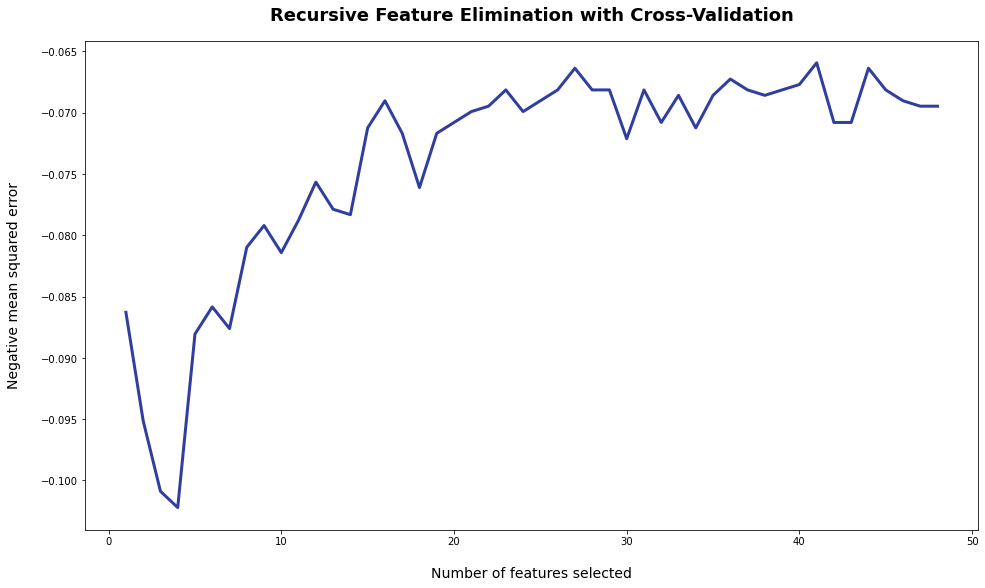

['alcohol_use',
 'nuuska',
 'cigarette',
 'e_cigarette',
 'prob_country',
 'prob_resident',
 'risk_of_use',
 'risk_of_try',
 'cannabis_access',
 'other_drug_access',
 'intoxicant_access',
 'doping_access',
 'current_health',
 'sport',
 'has_child_1',
 'non_medical_1',
 'single_1',
 'in_relation_1',
 'helsinki_1',
 'bigger_city_1',
 'midsize_city_1',
 'small_city_1',
 'rural_1',
 'drug_user_friend_1',
 'drug_offer_1',
 'alcohol_hp_1',
 'drug_hp_1',
 'employment_1',
 'gender_2',
 'age_bins_(24, 34]',
 'age_bins_(34, 44]',
 'age_bins_(54, 70]',
 'household_2.0',
 'household_3.0',
 'education_3.0',
 'education_4.0',
 'violence_treat_2.0',
 'violence_treat_3.0',
 'drug_punishment_2.0',
 'drug_punishment_3.0',
 'drug_punishment_4.0']

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

def RFECV_ranking(X,y):
  rf = RandomForestClassifier(n_estimators= 100, random_state=112) # 1500
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='neg_mean_squared_error') # 10
  rfecv.fit(X,y)
  
      
  print('Optimal number of features: {}'.format(rfecv.n_features_))
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('Negative mean squared error', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()
  
  features = [f for f,s in zip(data.columns[1:], rfecv.support_) if s]
  return features

RFECV_ranking(X_train_std, y_train)

## 2. Accuracy score


Optimal number of features: 41


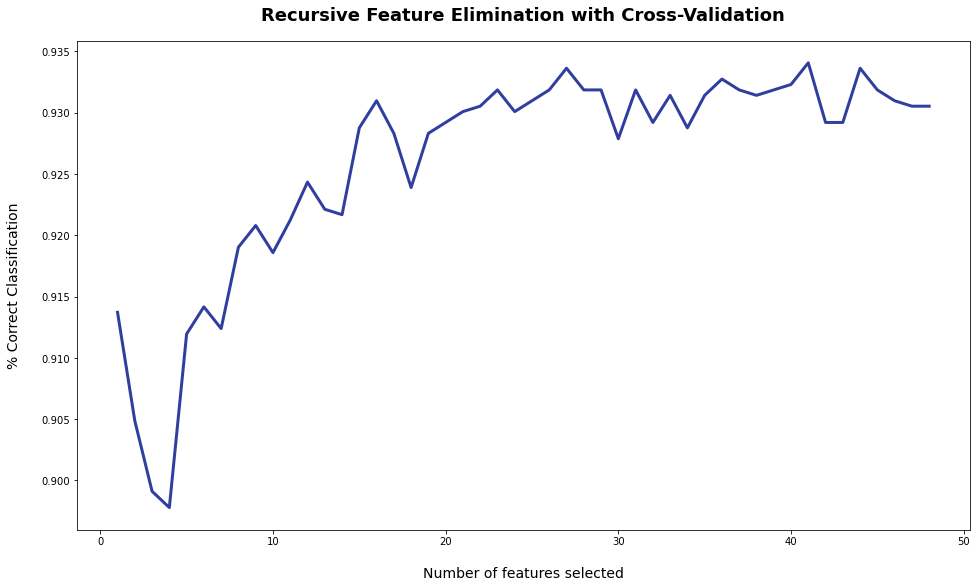

['alcohol_use',
 'nuuska',
 'cigarette',
 'e_cigarette',
 'prob_country',
 'prob_resident',
 'risk_of_use',
 'risk_of_try',
 'cannabis_access',
 'other_drug_access',
 'intoxicant_access',
 'doping_access',
 'current_health',
 'sport',
 'has_child_1',
 'non_medical_1',
 'single_1',
 'in_relation_1',
 'helsinki_1',
 'bigger_city_1',
 'midsize_city_1',
 'small_city_1',
 'rural_1',
 'drug_user_friend_1',
 'drug_offer_1',
 'alcohol_hp_1',
 'drug_hp_1',
 'employment_1',
 'gender_2',
 'age_bins_(24, 34]',
 'age_bins_(34, 44]',
 'age_bins_(54, 70]',
 'household_2.0',
 'household_3.0',
 'education_3.0',
 'education_4.0',
 'violence_treat_2.0',
 'violence_treat_3.0',
 'drug_punishment_2.0',
 'drug_punishment_3.0',
 'drug_punishment_4.0']

In [8]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

def RFECV_ranking(X,y):
  rf = RandomForestClassifier(n_estimators= 100, random_state=112) # 1500
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='accuracy') # 10
  rfecv.fit(X,y)
  
      
  print('Optimal number of features: {}'.format(rfecv.n_features_))
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()
  
  features = [f for f,s in zip(data.columns[1:], rfecv.support_) if s]
  return features

RFECV_ranking(X_train_std, y_train)

## 3. F-Scores (f1_macro)

Optimal number of features: 16


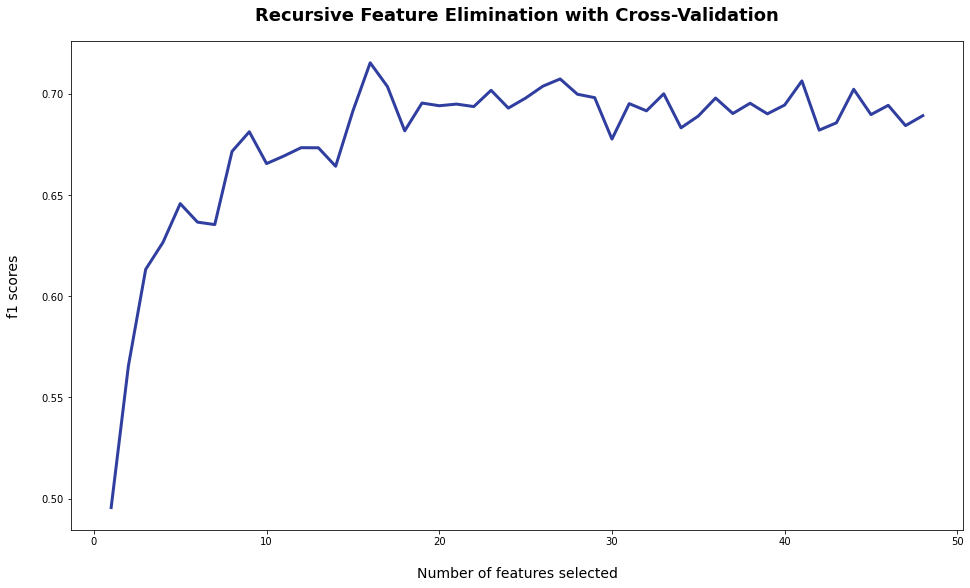

['alcohol_use',
 'nuuska',
 'cigarette',
 'e_cigarette',
 'prob_country',
 'prob_resident',
 'risk_of_use',
 'risk_of_try',
 'cannabis_access',
 'other_drug_access',
 'intoxicant_access',
 'doping_access',
 'sport',
 'non_medical_1',
 'drug_user_friend_1',
 'drug_offer_1']

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

def RFECV_ranking(X,y):
  rf = RandomForestClassifier(n_estimators= 100, random_state=112) # 1500
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='f1_macro') # 10
  rfecv.fit(X,y)
  
      
  print('Optimal number of features: {}'.format(rfecv.n_features_))
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('f1 scores', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()
  
  features = [f for f,s in zip(data.columns[1:], rfecv.support_) if s]
  return features


RFECV_ranking(X_train_std, y_train)

**Summary:** As seen here, our inbalanced data has a lower f1 score, which indicates we need other techniques to remedy this problem. Please read our summary for further clarification.

# Random Forest RFE and RFECV


Let’s get a couple of imports out of the way:

- Pipeline — since we’ll perform some cross-validation. It’s best practice in order to avoid data leakage.
- RepeatedStratifiedKFold — for repeated stratified cross-validation.
- cross_val_score — for evaluating the score on cross-validation.
- GradientBoostingClassifier — the estimator we’ll use.
- numpy — so that we can compute the mean of the scores.

The codes were adapted from [Derrick Mwiti post here](https://heartbeat.comet.ml/feature-ranking-with-recursive-feature-elimination-3e22db639208)




In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

The first step is to create an instance of the RFE class while specifying the estimator and the number of features you’d like to select. In this case, we’re selecting 20:

Next, we create an instance of the model we’d like to use:

In [11]:
from sklearn.ensemble import RandomForestClassifier

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

model = RandomForestClassifier(n_estimators=100, random_state=112)

We’ll use a Pipeline to transform the data. In the Pipeline we specify rfe for the feature selection step and the model that’ll be used in the next step.  

We then specify a RepeatedStratifiedKFold with 10 splits and 5 repeats. The stratified K fold ensures that the number of samples from each class is well balanced in each fold. RepeatedStratifiedKFold repeats the stratified K fold the specified number of times, with a different randomization in each repetition.

In [12]:
pipeline = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train_std, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.698684584400264

The next step is to fit this pipeline to the dataset.

In [13]:
pipeline.fit(X_train_std, y_train)

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=RandomForestClassifier(),
                     n_features_to_select=20)),
                ('Model', RandomForestClassifier(random_state=112))])

In [14]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False])

We can put that into a dataframe and check the result.

In [15]:
pd.DataFrame(rfe.support_,index=data.columns[1:],columns=['Rank'])

,Rank
alcohol_use,True
nuuska,True
cigarette,True
e_cigarette,True
prob_country,True
prob_resident,True
risk_of_use,True
risk_of_try,True
cannabis_access,True
other_drug_access,True


We can also check the relative rankings.

In [16]:
rf_df = pd.DataFrame(rfe.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head(10)

,Rank
alcohol_use,1
drug_punishment_2.0,1
household_2.0,1
non_medical_1,1
"age_bins_(24, 34]",1
sport,1
current_health,1
doping_access,1
drug_offer_1,1
intoxicant_access,1


## 2.1. Automatic feature selection: RFECV

Instead of manually configuring the number of features, it would be very nice if we could automatically select them. This can be achieved via recursive feature elimination and cross-validation. This is done via the sklearn.feature_selection.RFECV class. The class takes the following parameters:

- estimator — similar to the RFE class.
- min_features_to_select — the minimum number of features to be selected.
- cv— the cross-validation splitting strategy.

**The attributes returned are:**

- n_features_ — the optimal number of features selected via cross-validation.
- support_ — the array containing information on the selection of a feature.
- ranking_ — the ranking of the features.
- grid_scores_ — the scores obtained from cross-validation.

The first step is to import the class and create its instance.



In [17]:
from sklearn.ensemble import RandomForestClassifier

rfecv= RFECV(estimator=RandomForestClassifier())


The next step is to specify the pipeline and the cv. In this pipeline we use the just created rfecv.



In [18]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=92116)
n_scores = cross_val_score(pipeline, X_train_std, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.7028239134658434

Let’s fit the pipeline and then obtain the optimal number of features.

In [19]:
pipeline.fit(X_train_std, y_train)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=RandomForestClassifier())),
                ('Model', RandomForestClassifier(random_state=112))])

In [20]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False])

The optimal number of features can be obtained via the n_features_ attribute.

In [21]:
print('Optimal number of features : %d' % rfecv.n_features_)


Optimal number of features : 23


The rankings and support can be obtained just like last time.

In [22]:
rfecv.support_rfecv_df = pd.DataFrame(rfecv.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv.support_rfecv_df.head()

,Rank
alcohol_use,1
"age_bins_(24, 34]",1
household_2.0,1
drug_hp_1,1
violence_treat_2.0,1


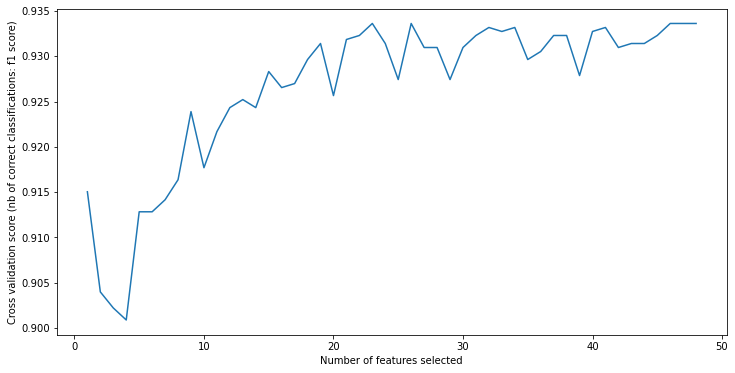

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications: f1 score)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [24]:
# list of features for further use

dt_cloumns = rf_df[rf_df['Rank']==1].reset_index()
dt_cloumns= dt_cloumns['index'].to_list()
dt_cloumns

['alcohol_use',
 'drug_punishment_2.0',
 'household_2.0',
 'non_medical_1',
 'age_bins_(24, 34]',
 'sport',
 'current_health',
 'doping_access',
 'drug_offer_1',
 'intoxicant_access',
 'cannabis_access',
 'risk_of_try',
 'risk_of_use',
 'prob_resident',
 'prob_country',
 'e_cigarette',
 'cigarette',
 'nuuska',
 'other_drug_access',
 'drug_user_friend_1']

# RFE GradientBoostingClassifier

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=20)
model = GradientBoostingClassifier()

In [27]:
# pipeline
pipe = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=92116)
n_scores = cross_val_score(pipe, X_train_std, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.7188093350858956

In [28]:
pipe.fit(X_train_std, y_train)

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=GradientBoostingClassifier(),
                     n_features_to_select=20)),
                ('Model', GradientBoostingClassifier())])

In [29]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
        True, False, False])

In [30]:
pd.DataFrame(rfe.support_,index=data.columns[1:],columns=['Rank'])

,Rank
alcohol_use,True
nuuska,True
cigarette,True
e_cigarette,True
prob_country,True
prob_resident,False
risk_of_use,True
risk_of_try,True
cannabis_access,True
other_drug_access,False


In [31]:
rf_df = pd.DataFrame(rfe.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head(10)

,Rank
alcohol_use,1
drug_hp_1,1
"age_bins_(24, 34]",1
household_2.0,1
single_1,1
non_medical_1,1
sport,1
current_health,1
drug_offer_1,1
intoxicant_access,1


## Automatic Feature Selection

In [32]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=GradientBoostingClassifier())
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train_std, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.7111926820828803

In [33]:
pipeline.fit(X_train_std,y_train)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=GradientBoostingClassifier())),
                ('Model', GradientBoostingClassifier())])

In [34]:
print('Optimal number of features : %d' % rfecv.n_features_)

Optimal number of features : 23


In [35]:
rfecv.support_rfecv_df = pd.DataFrame(rfecv.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv.support_rfecv_df.head(15)

,Rank
alcohol_use,1
drug_hp_1,1
helsinki_1,1
"age_bins_(24, 34]",1
household_2.0,1
single_1,1
non_medical_1,1
has_child_1,1
sport,1
current_health,1


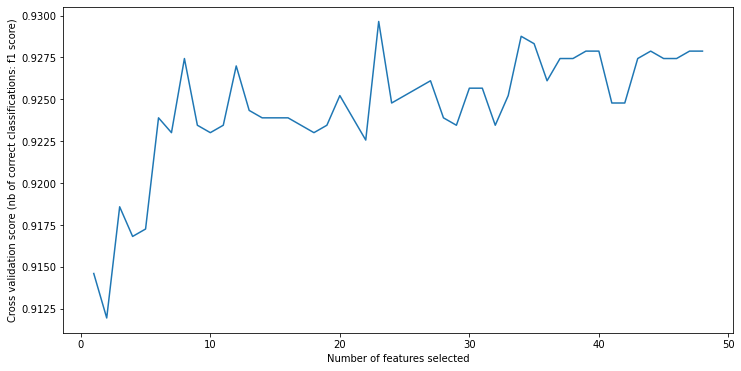

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications: f1 score)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [37]:
# list of features for further use

dt_cloumns = rf_df[rf_df['Rank']==1].reset_index()
dt_cloumns= dt_cloumns['index'].to_list()
dt_cloumns

['alcohol_use',
 'drug_hp_1',
 'age_bins_(24, 34]',
 'household_2.0',
 'single_1',
 'non_medical_1',
 'sport',
 'current_health',
 'drug_offer_1',
 'intoxicant_access',
 'violence_treat_2.0',
 'cannabis_access',
 'risk_of_try',
 'risk_of_use',
 'prob_country',
 'e_cigarette',
 'cigarette',
 'nuuska',
 'drug_punishment_2.0',
 'drug_user_friend_1']

# RFE SVC  

We use the same method here and below to just compare the model differences. 

In [109]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor

model_estimator =  SVC(kernel="linear", C=50)

rfe = RFE(estimator=model_estimator, n_features_to_select=20)

model = SVC(kernel="linear", C= 50)

In [110]:
pipeline = Pipeline([('Feature Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train_std, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.6908971984146018

In [111]:
pipeline.fit(X_train_std, y_train)

Pipeline(steps=[('Feature Selection',
                 RFE(estimator=SVC(C=50, kernel='linear'),
                     n_features_to_select=20)),
                ('Model', SVC(C=50, kernel='linear'))])

In [112]:
rfe.support_

array([ True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True, False,
        True,  True,  True, False, False, False, False, False,  True,
        True,  True, False, False,  True, False, False, False, False,
        True,  True,  True])

In [113]:
pd.DataFrame(rfe.support_,index=data.columns[1:],columns=['Rank'])

,Rank
alcohol_use,True
nuuska,False
cigarette,False
e_cigarette,False
prob_country,True
prob_resident,False
risk_of_use,False
risk_of_try,True
cannabis_access,False
other_drug_access,False


In [114]:
rf_df = pd.DataFrame(rfe.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rf_df.head(10)

,Rank
alcohol_use,1
drug_punishment_2.0,1
education_2.0,1
"age_bins_(54, 70]",1
"age_bins_(44, 54]",1
"age_bins_(34, 44]",1
poly_hp_1,1
medicine_hp_1,1
drug_hp_1,1
drug_offer_1,1


## Automatic feature selection with SVC

In [115]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=model_estimator)

In [116]:
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=92116)
n_scores = cross_val_score(pipeline, X_train_std, y_train, scoring='f1_macro', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.7307334140538565

In [118]:
pipeline.fit(X_train_std,y_train)

Pipeline(steps=[('Feature Selection',
                 RFECV(estimator=SVC(C=50, kernel='linear'))),
                ('Model', SVC(C=50, kernel='linear'))])

In [119]:
print('Optimal number of features : %d' % rfecv.n_features_)

Optimal number of features : 40


In [120]:
rfecv.support_rfecv_df = pd.DataFrame(rfecv.ranking_,index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv.support_rfecv_df.head(10)

,Rank
alcohol_use,1
drug_user_friend_1,1
drug_offer_1,1
drug_hp_1,1
medicine_hp_1,1
poly_hp_1,1
doping_hp_1,1
gender_2,1
"age_bins_(24, 34]",1
drug_punishment_3.0,1


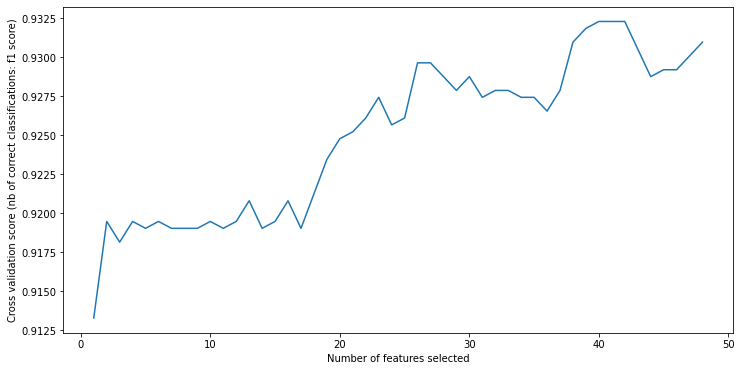

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications: f1 score)')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [122]:
# list of features for further use

dt_cloumns = rf_df[rf_df['Rank']==1].reset_index()
dt_cloumns= dt_cloumns['index'].to_list()
dt_cloumns

['alcohol_use',
 'drug_punishment_2.0',
 'education_2.0',
 'age_bins_(54, 70]',
 'age_bins_(44, 54]',
 'age_bins_(34, 44]',
 'poly_hp_1',
 'medicine_hp_1',
 'drug_hp_1',
 'drug_offer_1',
 'drug_user_friend_1',
 'drug_punishment_3.0',
 'midsize_city_1',
 'in_relation_1',
 'divorced_1',
 'single_1',
 'drug_punishment_4.0',
 'non_medical_1',
 'risk_of_try',
 'prob_country']

# Summary


- The accuracy scores are satisfactory in these models to select features but the main problem is imbalance data, which indicates we need to apply oversampling or downsampling techniques. 
- Since our label data are very rare (around 8,5%), it would be wise to select upsampling strategy, but we will compare their results in the next section. 
- it is still promising that with around 10-15 indicators, we can predict how likely a person use cannabis. I particularly select features representing the daily life of individuals, in terms of his/her perception about the health risks of drug use, accessibility to drugs, control variables such as gender, marriage status, having a child, etc.